In [ ]:
# Mini Binance order book suport risitance finder

In [ ]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import ccxt as ccxt
import math

In [ ]:
exchange = ccxt.binance()
symbol = 'AGIX/BUSD'
df_bid = pd.DataFrame(exchange.fetch_order_book(symbol, 1000)['bids'], columns=['price', 'quantity'])
df_ask = pd.DataFrame(exchange.fetch_order_book(symbol, 1000)['asks'], columns=['price', 'quantity'])
df_bid['usd_quantity'] = df_bid['price'] *  df_bid['quantity']
df_ask['usd_quantity'] = df_ask['price'] *  df_ask['quantity']

In [ ]:
#df_bid['usd_quantity'].nlargest(10)
precision=30
resitance_line_nbr=5
support_line_nbr=5
df_bid.sort_values(by='usd_quantity', ascending=False)[:precision].sort_index()[:resitance_line_nbr]

In [ ]:
0.2*(df_bid.price.mean()+df_ask.price.mean())/200

In [ ]:
df_ask.sort_values(by='usd_quantity', ascending=False)[:precision].sort_index()[:support_line_nbr]

In [ ]:
askp.price.to_list()[5]

In [ ]:
## Ploting

# Get the historical OHLCV data for the specified symbol and timeframe
symbol = 'BTC/USDT'
timeframe = '1m'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)

# Convert the OHLCV data to a pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Set the timestamp column as the index and convert it to a DatetimeIndex
df.index = pd.to_datetime(df['Timestamp'], unit='ms')
df = df.drop(columns=['Timestamp'])

# Plot the candlestick chart
mpf.plot(df[-200:], type='candlestick', volume=True, show_nontrading=False)
# Show the plot
mpf.show()

In [ ]:
precision=50
resitance_line_nbr=10
support_line_nbr=10
exchange = ccxt.binance()
symbol = 'AGIX/BUSD'
df_bid = pd.DataFrame(exchange.fetch_order_book(symbol, 1000)['bids'], columns=['price', 'quantity'])
df_ask = pd.DataFrame(exchange.fetch_order_book(symbol, 1000)['asks'], columns=['price', 'quantity'])
df_bid['usd_quantity'] = df_bid['price'] *  df_bid['quantity']
df_ask['usd_quantity'] = df_ask['price'] *  df_ask['quantity']
top_bids=df_bid.sort_values(by='usd_quantity', ascending=False)[:precision].sort_index()[:resitance_line_nbr]
top_asks=df_ask.sort_values(by='usd_quantity', ascending=False)[:precision].sort_index()[:support_line_nbr]
timeframe = '1m'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
colors=[]
for i in range(resitance_line_nbr):
    colors.append("r")
for i in range(support_line_nbr):
   colors.append("g")
# Convert the OHLCV data to a pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Set the timestamp column as the index and convert it to a DatetimeIndex
df.index = pd.to_datetime(df['Timestamp'], unit='ms')
df = df.drop(columns=['Timestamp'])

spline=top_bids.price.mean()
rsline=top_asks.price.mean()

spdiff=((top_bids.price.max()-top_bids.price.min())/top_bids.price.mean()*100)
rsdiff=((top_asks.price.max()-top_asks.price.min())/top_asks.price.mean()*100)


sp_std=top_bids.price.std()*1000#((top_bids.price.max()-top_bids.price.min())/top_bids.price.mean()*100)
rs_std=top_asks.price.std()*1000#((top_asks.price.max()-top_asks.price.min())/top_asks.price.mean()*100)
hlines=top_bids.price.to_list()+top_asks.price.to_list()+[rsline,spline]
colors=colors+['cyan','magenta']
print(f"support:{spline}")
print(f"Resistance:{rsline}")
print(f"support diff:{spdiff}%")
print(f"Resistance diff:{rsdiff}%")
notediff=100*rsdiff/spdiff
if(notediff<150):print(f"goin down v: {notediff}")
else:print(f"goin up ^:{notediff}")

ax=mpf.plot(df[-100:], type='candlestick', volume=True, show_nontrading=False, 
            hlines=dict(hlines=hlines
                        ,colors=colors,linestyle='-.')
            )
# Show the plot
#ax.show()

In [532]:

def top_quantity_sum_price_mean(order_book_df,price_interval_pct=0.2,precision=50,val_nbr=10):
    df=order_book_df
    step_size = price_interval_pct/100 * df['price'][0]

    # create an array of bin edges
    bin_edges = np.arange(df['price'].min(), df['price'].max() + step_size, step_size)

    # use the cut function to bin the values
    bins = pd.cut(df['price'], bins=bin_edges)

    # group the values by bin
    grouped = df.groupby(bins)


    result = pd.DataFrame({'price_mean': grouped['price'].mean(),
                        'quantity_sum': grouped['quantity'].sum()})
    return result.sort_values(by='quantity_sum', ascending=False)[:precision].sort_values(by='price_mean', ascending=False)[:val_nbr]

top_quantity_sum_price_mean(order_book_df=df_ask,price_interval_pct=0.2,precision=40,val_nbr=3)



def top_quantity_sum_price_mean_inverted(order_book_df,price_interval_pct=0.2,precision=50,val_nbr=10):
    df=order_book_df
    step_size = price_interval_pct/100 * df['price'][0]

    # create an array of bin edges
    bin_edges = np.arange(df['price'].min(), df['price'].max() + step_size, step_size)

    # use the cut function to bin the values
    bins = pd.cut(df['price'], bins=bin_edges)

    # group the values by bin
    grouped = df.groupby(bins)


    result = pd.DataFrame({'price_mean': grouped['price'].mean(),
                        'quantity_sum': grouped['quantity'].sum()})
    return result.sort_values(by='quantity_sum', ascending=False)[:precision].sort_values(by='price_mean', ascending=True)[:val_nbr]

top_quantity_sum_price_mean(order_book_df=df_bid,price_interval_pct=0.2,precision=30,val_nbr=3)
top_quantity_sum_price_mean_inverted(order_book_df=df_ask,price_interval_pct=0.2,precision=30,val_nbr=3)



,price_mean,quantity_sum
price,,
"(0.426, 0.427]",0.426689,77504.0
"(0.427, 0.428]",0.427686,108374.0
"(0.428, 0.429]",0.428618,111625.0


In [ ]:
result.sort_values(by='quantity_sum', ascending=False)[:precision]

In [ ]:
top_quantity_sum_price_mean(order_book_df=df_bid,price_interval_pct=0.1,precision=200,val_nbr=6)

In [ ]:
precision=100
resitance_line_nbr=3
support_line_nbr=3
exchange = ccxt.binance()
symbol = 'AGIX/BUSD'
df_bid = pd.DataFrame(exchange.fetch_order_book(symbol, 100)['bids'], columns=['price', 'quantity'])
df_ask = pd.DataFrame(exchange.fetch_order_book(symbol, 100)['asks'], columns=['price', 'quantity'])
df_bid['usd_quantity'] = df_bid['price'] *  df_bid['quantity']
df_ask['usd_quantity'] = df_ask['price'] *  df_ask['quantity']
top_bids=top_quantity_sum_price_mean(order_book_df=df_bid,price_interval_pct=0.2,precision=precision,val_nbr=resitance_line_nbr)
top_asks=top_quantity_sum_price_mean_inverted(order_book_df=df_ask,price_interval_pct=0.2,precision=precision,val_nbr=support_line_nbr)
timeframe = '1m'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe,limit=100)
colors=[]
for i in range(resitance_line_nbr):
    colors.append("r")
for i in range(support_line_nbr):
   colors.append("g")
# Convert the OHLCV data to a pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Set the timestamp column as the index and convert it to a DatetimeIndex
df.index = pd.to_datetime(df['Timestamp'], unit='ms')
df = df.drop(columns=['Timestamp'])


spline=top_bids.price_mean.mean()
rsline=top_asks.price_mean.mean()

spdiff=((top_bids.price_mean.max()-top_bids.price_mean.min())/top_bids.price_mean.mean()*100)
rsdiff=((top_asks.price_mean.max()-top_asks.price_mean.min())/top_asks.price_mean.mean()*100)


sp_std=top_bids.price_mean.std()*1000#((top_bids.price.max()-top_bids.price.min())/top_bids.price.mean()*100)
rs_std=top_asks.price_mean.std()*1000#((top_asks.price.max()-top_asks.price.min())/top_asks.price.mean()*100)
hlines=top_bids.price_mean.to_list()+top_asks.price_mean.to_list()+[rsline,spline]
colors=colors+['cyan','magenta']
print(f"support:{spline}")
print(f"Resistance:{rsline}")
print(f"support diff:{spdiff}%")
print(f"Resistance diff:{rsdiff}%")
notediff=100*rsdiff/spdiff
if(notediff<150):print(f"goin down v: {notediff}")
else:print(f"goin up ^:{notediff}")

ax=mpf.plot(df[-100:], type='candlestick', volume=True, show_nontrading=False, 
            hlines=dict(hlines=hlines
                        ,colors=colors,linestyle='-.')
            )
# Show the plot
#ax.show()
colors


# print order list

In [ ]:
import datetime

while True:
    precision=100
    resitance_line_nbr=3
    support_line_nbr=3
    exchange = ccxt.binance()
    symbol = 'AGIX/BUSD'
    current_time = datetime.datetime.now().time()
    df_bid = pd.DataFrame(exchange.fetch_order_book(symbol, 100)['bids'], columns=['price', 'quantity'])
    df_ask = pd.DataFrame(exchange.fetch_order_book(symbol, 100)['asks'], columns=['price', 'quantity'])
    df_bid['usd_quantity'] = df_bid['price'] *  df_bid['quantity']
    df_ask['usd_quantity'] = df_ask['price'] *  df_ask['quantity']
    top_bids=top_quantity_sum_price_mean(order_book_df=df_bid,price_interval_pct=0.2,precision=precision,val_nbr=resitance_line_nbr)
    top_asks=top_quantity_sum_price_mean_inverted(order_book_df=df_ask,price_interval_pct=0.2,precision=precision,val_nbr=support_line_nbr)
    timeframe = '1m'
    colors=[]
    for i in range(resitance_line_nbr):
        colors.append("r")
    for i in range(support_line_nbr):
        colors.append("g")
 
    spline=top_bids.price_mean.mean()
    rsline=top_asks.price_mean.mean()
    print (f" support: {spline} - resistance {rsline} at :{current_time}")
    


# exemple of code using order book

In [ ]:
import ccxt

def calculate_trade_price(order_book, trading_fee):
    ask_price = order_book['asks'][0][0]
    bid_price = order_book['bids'][0][0]
    trade_price = (ask_price + bid_price) / 2
    trade_price_with_fee = trade_price * (1 + trading_fee)
    return trade_price_with_fee

def simulate_trade(exchange, market, trading_fee):
    order_book = exchange.fetch_order_book(market)
    trade_price = calculate_trade_price(order_book, trading_fee)
    trade_amount = 0.01
    print("Simulating a margin limit buy order for", trade_amount, "at", trade_price)

def main():
    exchange = ccxt.binance()
    market = 'BTC/USDT'
    trading_fee = 0.002
    for i in range(10): # Number of simulations
        simulate_trade(exchange, market, trading_fee)

if __name__ == "__main__":
    main()


# ChatGPT Test Code

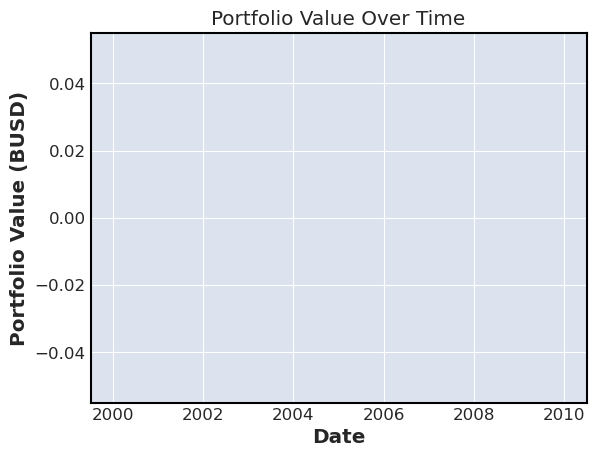

In [538]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the exchange using CCXT
exchange = ccxt.binance()
symbol = 'BTC/BUSD'

# Retrieve the historical OHLCV data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe='1m')
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.set_index('timestamp')

# Define the start and end dates for the backtest
start_date = '2023-01-01'
end_date = '2023-02-11'

# Filter the dataframe to only include the specified period
df = df[start_date:end_date]

# Calculate the mid-price for each minute
df['mid_price'] = (df['high'] + df['low']) / 2

# Initialize the portfolio
portfolio = {'btc': 0, 'busd': 1000}

# Backtest the trading strategy
portfolio_values = []
for i in range(1, len(df)):
    current_price = df.at[df.index[i], 'mid_price']
    previous_price = df.at[df.index[i-1], 'mid_price']

    if current_price > previous_price:
        # Buy Bitcoin
        btc_quantity = portfolio['busd'] / current_price
        portfolio['btc'] += btc_quantity
        portfolio['busd'] -= btc_quantity * current_price
    elif current_price < previous_price:
        # Sell Bitcoin
        busd_quantity = portfolio['btc'] * current_price
        portfolio['busd'] += busd_quantity
        portfolio['btc'] -= busd_quantity / current_price

    portfolio_values.append(portfolio['btc'] * current_price + portfolio['busd'])

# Create a plot of the portfolio value over time
plt.plot(df.index[1:], portfolio_values)
plt.xlabel('Date')
plt.ylabel('Portfolio Value (BUSD)')
plt.title('Portfolio Value Over Time')
plt.show()


In [ ]:
import requests

# Define your subscription key and endpoint
subscription_key = "your_subscription_key"
endpoint = "https://api.bing.microsoft.com/v7.0/search"

# Define your query and parameters
query = "generate python code for a simple calculator app"
params = {"q": query, "mkt": "en-US", "responseFilter": "Webpages"}

# Make the request and get the response
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
response = requests.get(endpoint, headers=headers, params=params)
response.raise_for_status()
results = response.json()

# Extract the generated code from the first web page result
code = results["webPages"]["value"][0]["snippet"]

# Print the generated code
print(code)
